## PCA 

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
sn.set_theme(
    context="paper",
    style="white",
    font_scale=1.8,
    rc={"lines.linewidth": 2},
    palette="tab10",
)



In [2]:
load_error = pd.read_csv("../src/data/load_errors_date.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
pv_error = pd.read_csv("../src/data/pv_errors_date.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)

In [12]:
def remove_outliers(df, N_start, N, pl= 5, pu=95):
    steps = [str(i) for i in range(N_start,N)]
    print("Shape before", df.shape)
    upper = np.percentile(df[str(N-1)], pu)
    lower = np.percentile(df[str(N-1)], pl)
    for step in steps:
        df = df[(df[step] < upper) & (df[step] > lower)]
    print("Shape after", df.shape)
    return df


load_error = remove_outliers(load_error, 0, 60)
pv_error = remove_outliers(pv_error, 1, 61)


Shape before (2820, 62)
Shape after (1881, 62)
Shape before (2820, 62)
Shape after (1155, 62)


In [14]:
N = 30
steps = [str(i) for i in range(N)]
all_errors_pv = pv_error.filter(steps).values.flatten()
all_errors_load = load_error.filter(steps).values.flatten()[:len(all_errors_pv)]
len(all_errors_load), len(all_errors_pv)

(33495, 33495)

In [15]:
data = pd.DataFrame(data= {"PV":all_errors_pv, "Load":all_errors_load})

In [6]:
data.corr()

,PV,Load
PV,1.000000,-0.029134
Load,-0.029134,1.000000


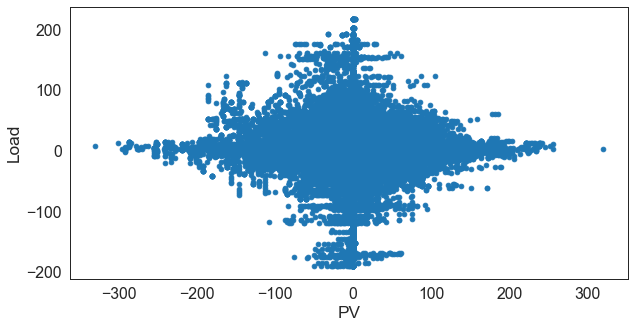

In [180]:
def scatter_plot(x, y):
    plt.figure(figsize =(10,5))
    plt.scatter(x, y)
    plt.xlabel("PV")
    plt.ylabel("Load")
    
scatter_plot(data.PV, data.Load)

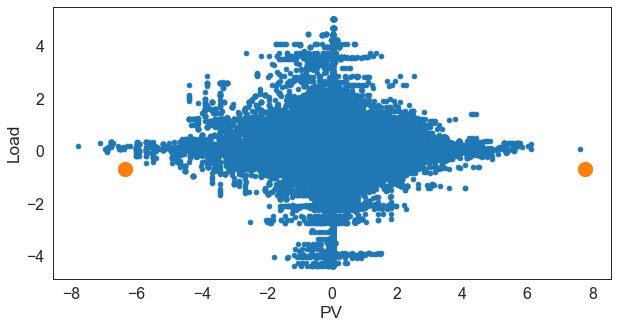

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

scatter_plot(data_std[:,0], data_std[:,1])
plt.scatter(inverse[:,0], inverse[:,1], s = 200)

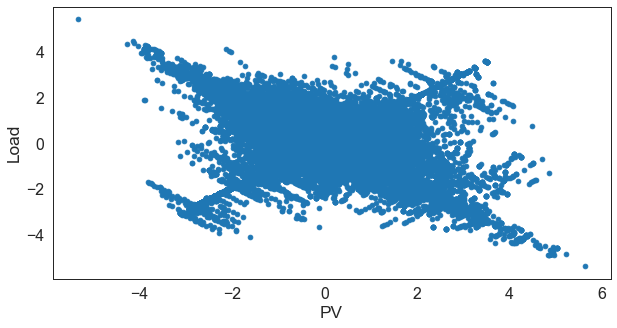

In [182]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)
scatter_plot(data_pca[:,0], data_pca[:,1])

"""
plt.scatter(pv_max, load_min, s = 200, color = "r")
plt.scatter(pv_max, load_max, s = 200, color = "r")
plt.scatter(pv_min, load_min, s = 200, color = "r")
plt.scatter(pv_min, load_max, s = 200, color = "r")
"""
plt.show()

In [163]:
data_pca.max(axis = 0)

array([5.34972099, 6.68512114])

In [164]:
inverse = pca.inverse_transform([[pv_max, load_min],
                      [pv_min, load_max],
                      [pv_max, load_min],
                      [pv_min, load_max]])

[]

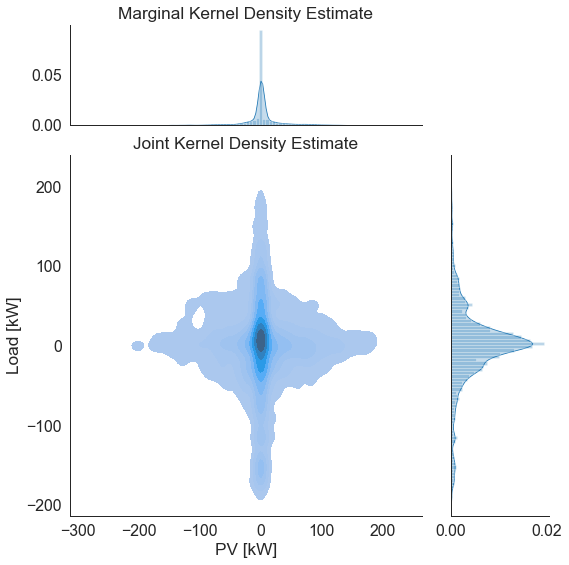

In [7]:
import matplotlib.patches as patches

sn.set_theme(
    context="paper",
    style="white",
    font_scale=1.8,
    rc={"lines.linewidth": 2},
    palette="tab10",
)


ax = sn.jointplot(data=data, x="PV", y="Load", kind="kde", fill =True,
                marginal_ticks=True ,height = 8, ratio = 3, dropna =True, space = 0.3, marginal_kws=dict(fill=True))


ax_joint = ax.ax_joint
pv_ax = ax.ax_marg_x
load_ax = ax.ax_marg_y
"""
ax_joint.add_patch(patches.Rectangle((-150, -40), 270, 90, fill = False, color= "k", lw= 2, alpha = 0.2))

ax_joint.text(-155, 56, "A")
ax_joint.scatter(-150, 50, color = "k", s= 60)

ax_joint.text(115, 56, "B")
ax_joint.scatter(120, 50, s= 60, color = "k",)

ax_joint.text(-155, -56, "C")
ax_joint.scatter(-150, -40, s= 60, color = "k",)

ax_joint.text(115, -56, "D")
ax_joint.scatter(120, -40, s= 60, color = "k",)
"""
ax_joint.set_title("Joint Kernel Density Estimate")
pv_ax.set_title("Marginal Kernel Density Estimate")
ax_joint.set_xlabel("PV [kW]")
ax_joint.set_ylabel("Load [kW]")

pv_ax.hist(data.PV, 100, density=True, alpha = 0.3)
load_ax.hist(data.Load, 100, density=True, alpha = 0.3, orientation=u'horizontal')

plt.savefig("../figs/jointkde_full.png", format="png")

plt.plot()

[]

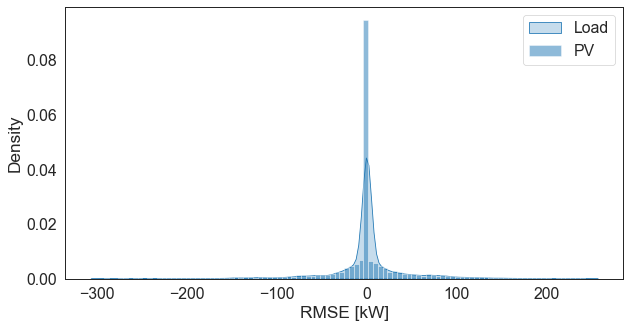

In [8]:
plt.figure(figsize = (10, 5))
n, bins, rectangles = plt.hist(data.PV, 100, density=True, alpha = 0.5)

sn.kdeplot(data=data, x= "PV", common_norm = 1, fill = True)
plt.legend(["Load", "PV"])
plt.xlabel("RMSE [kW]")
plt.plot()

[]

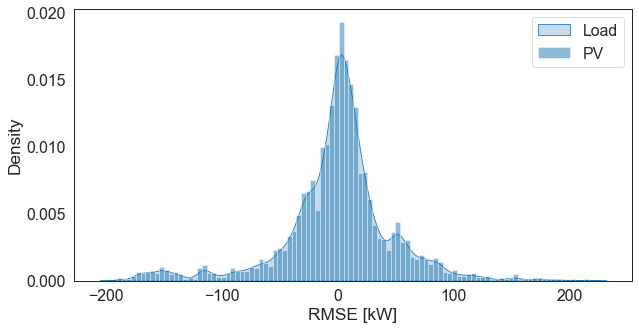

In [9]:
plt.figure(figsize = (10, 5))
n, bins, rectangles = plt.hist(data.Load, 100, density=True, alpha = 0.5)

sn.kdeplot(data=data, x= "Load", common_norm = 1, fill = True)
plt.legend(["Load", "PV"])
plt.xlabel("RMSE [kW]")
plt.plot()

In [228]:

def calculate_prob(n, bins, i):
    return np.sum(n[i:]*np.diff(bins[i:]))


calculate_prob(n, bins, 66)

0.019980435314257763

In [10]:
data_red = data[data.PV != 0].reset_index(drop = True)

[]

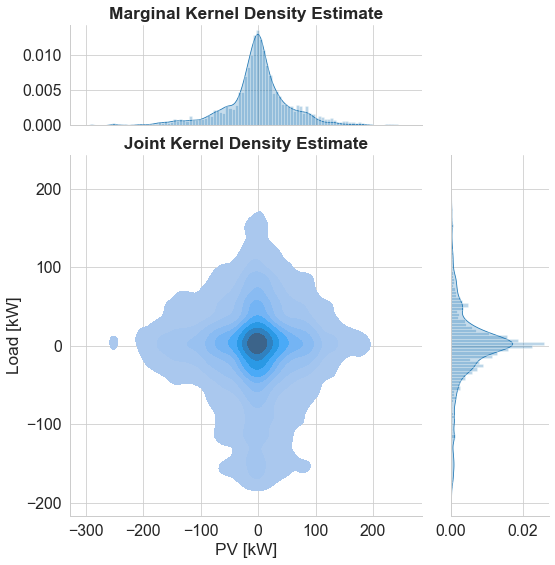

In [24]:

sn.set_theme(
    context="paper",
    style="whitegrid",
    font_scale=1.8,
    rc={"lines.linewidth": 2},
    palette="tab10",
)


ax = sn.jointplot(data=test[test.Type == "Prediction"], x="PV", y="Load", kind="kde", fill =True,
                marginal_ticks=True ,height = 8, ratio = 3, dropna =True, space = 0.3, marginal_kws=dict(fill=True))


ax_joint = ax.ax_joint
pv_ax = ax.ax_marg_x
load_ax = ax.ax_marg_y
"""
ax_joint.add_patch(patches.Rectangle((-150, -40), 270, 90, fill = False, color= "k", lw= 2, alpha = 0.2))

ax_joint.text(-155, 56, "A")
ax_joint.scatter(-150, 50, color = "k", s= 60)

ax_joint.text(115, 56, "B")
ax_joint.scatter(120, 50, s= 60, color = "k",)

ax_joint.text(-155, -56, "C")
ax_joint.scatter(-150, -40, s= 60, color = "k",)

ax_joint.text(115, -56, "D")
ax_joint.scatter(120, -40, s= 60, color = "k",)
"""
ax_joint.set_title("Joint Kernel Density Estimate", fontweight = "bold")
pv_ax.set_title("Marginal Kernel Density Estimate", fontweight = "bold")
ax_joint.set_xlabel("PV [kW]")
ax_joint.set_ylabel("Load [kW]")

pv_ax.hist(data_red.PV, 100, density=True, alpha = 0.3)
load_ax.hist(data_red.Load, 100, density=True, alpha = 0.3, orientation=u'horizontal')

#plt.savefig("../figs/jointkde.pdf", format="pdf")

plt.plot()

In [17]:
data_load = pd.read_csv("../src/data/scenario_errors_load.csv").drop("Unnamed: 0", axis =1)
data_pv = pd.read_csv("../src/data/scenario_errors_pv.csv").drop("Unnamed: 0", axis =1)
data_pv = data_pv[data_pv.prediction != 0].reset_index(drop=True)
data_load = data_load.sample(n=data_pv.shape[0]).reset_index(drop=True)

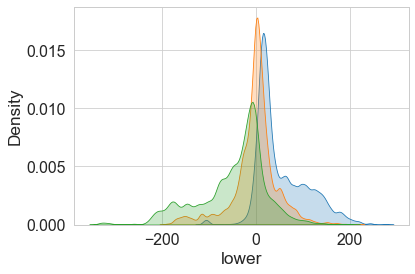

In [18]:
sn.kdeplot(data=data_load, x= "lower", common_norm = 1, fill = True)
sn.kdeplot(data=data_load, x= "prediction", common_norm = 1, fill = True)
sn.kdeplot(data=data_load, x= "upper", common_norm = 1, fill = True)
plt.show()

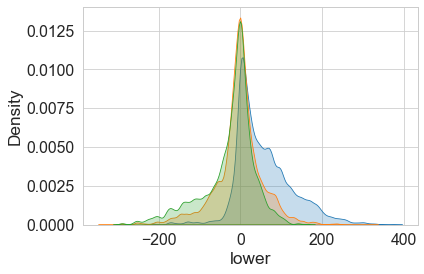

In [19]:


sn.kdeplot(data=data_pv, x= "lower", common_norm = 1, fill = True)
sn.kdeplot(data=data_pv, x= "prediction", common_norm = 1, fill = True)
sn.kdeplot(data=data_pv, x= "upper", common_norm = 1, fill = True)
plt.show()


In [20]:
all_errors = pd.DataFrame(columns = ["Type", "PV", "Load"])
all_errors = all_errors.append(pd.DataFrame(data={"Type": ["Prediction"]*data_pv.shape[0], "PV":data_pv.prediction, "Load":data_load.prediction}))
all_errors = all_errors.append(pd.DataFrame(data={"Type": ["Pessimistic"]*data_pv.shape[0], "PV":data_pv.upper, "Load":data_load.lower}))
all_errors = all_errors.append(pd.DataFrame(data={"Type": ["Optimistic"]*data_pv.shape[0], "PV":data_pv.lower, "Load":data_load.upper}))

In [21]:
print(all_errors.shape)
test = all_errors.sample(n=100000).reset_index(drop=True)

(273144, 3)


[]

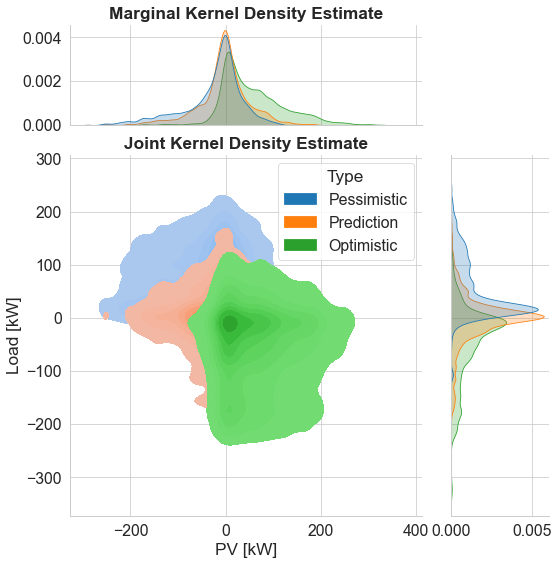

In [22]:

sn.set_theme(
    context="paper",
    style="whitegrid",
    font_scale=1.8,
    rc={"lines.linewidth": 2},
    palette="tab10",
)


ax = sn.jointplot(data=test, x="PV", y="Load", kind="kde", fill =True, hue="Type",
                marginal_ticks=True ,height = 8, ratio = 3, dropna =True, space = 0.3, marginal_kws=dict(fill=True))


ax_joint = ax.ax_joint
pv_ax = ax.ax_marg_x
load_ax = ax.ax_marg_y

ax_joint.set_title("Joint Kernel Density Estimate", fontweight = "bold")
pv_ax.set_title("Marginal Kernel Density Estimate", fontweight = "bold")
ax_joint.set_xlabel("PV [kW]")
ax_joint.set_ylabel("Load [kW]")

#pv_ax.hist(data_red.PV, 100, density=True, alpha = 0.3)
#load_ax.hist(data_red.Load, 100, density=True, alpha = 0.3, orientation=u'horizontal')

plt.savefig("../figs/jointkde_scenarios.pdf", format="pdf")

plt.plot()

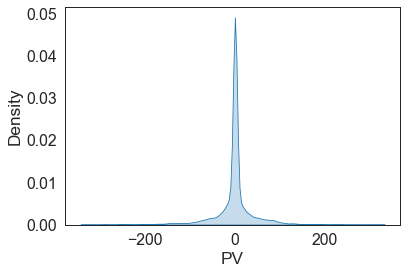

In [308]:
x = sn.kdeplot(data=data, x="PV", common_norm = 1, fill = True).get_lines()


In [318]:
all_errors[all_errors.Type == "Prediction"].describe()

,PV,Load
count,91048.000000,91048.000000
mean,-4.229259,-1.856540
std,59.224658,49.630153
min,-330.375000,-190.484375
25%,-25.023981,-18.718750
50%,-1.631435,1.812500
75%,21.705023,18.171875
max,319.645986,216.890625


In [321]:
all_errors.groupby("Type").describe()

PV                                                          \
               count       mean        std         min        25%        50%   
Type                                                                           
Optimistic   91048.0  56.032211  70.033634 -214.177634   6.353993  40.559427   
Pessimistic  91048.0 -26.147507  64.922969 -292.178156 -48.825498  -8.869248   
Prediction   91048.0  -4.229259  59.224658 -330.375000 -25.023981  -1.631435   

                                       Load                                    \
                   75%         max    count       mean        std         min   
Type                                                                            
Optimistic   94.494059  375.136183  91048.0 -46.961075  72.926881 -333.187500   
Pessimistic   9.548417  163.117510  91048.0  53.632838  55.142168 -112.500000   
Prediction   21.705023  319.645986  91048.0  -1.856540  49.630153 -190.484375   

                                                        
                  25%       50%        75%         max  
Type                                                    
Optimistic  -80.71875 -27.93750  -2.250000  200.343750  
Pessimistic  14.06250  31.21875  90.937500  277.125000  
Prediction  -18.71875   1.81250  18.171875  216.890625

In [322]:
np.array([70, 64, 59])/np.sum([70, 64, 59])

array([0.3626943 , 0.33160622, 0.30569948])